# WGAN 훈련

## 라이브러리 임포트

In [1]:
%matplotlib inline

import os
import numpy as np
import matplotlib.pyplot as plt

from models.WGAN import WGAN
from utils.loaders import load_cifar

Using TensorFlow backend.


In [2]:
# run params
SECTION = 'gan'
RUN_ID = '0002'
DATA_NAME = 'horses'
RUN_FOLDER = 'run/{}/'.format(SECTION)
RUN_FOLDER += '_'.join([RUN_ID, DATA_NAME])

if not os.path.exists(RUN_FOLDER):
    os.mkdir(RUN_FOLDER)
    os.mkdir(os.path.join(RUN_FOLDER, 'viz'))
    os.mkdir(os.path.join(RUN_FOLDER, 'images'))
    os.mkdir(os.path.join(RUN_FOLDER, 'weights'))

mode =  'build' #'load' #

## 데이터 적재

In [3]:
if DATA_NAME == 'cars':
    label = 1
elif DATA_NAME == 'horses':
    label = 7
(x_train, y_train) = load_cifar(label, 10)

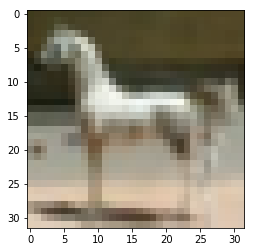

In [4]:
plt.imshow((x_train[150,:,:,:]+1)/2)

## 모델 생성

In [5]:
if mode == 'build':

    gan = WGAN(input_dim = (32,32,3)
            , critic_conv_filters = [32,64,128,128]
            , critic_conv_kernel_size = [5,5,5,5]
            , critic_conv_strides = [2,2,2,1]
            , critic_batch_norm_momentum = None
            , critic_activation = 'leaky_relu'
            , critic_dropout_rate = None
            , critic_learning_rate = 0.00005
            , generator_initial_dense_layer_size = (4, 4, 128)
            , generator_upsample = [2,2, 2,1]
            , generator_conv_filters = [128,64,32,3]
            , generator_conv_kernel_size = [5,5,5,5]
            , generator_conv_strides = [1,1, 1,1]
            , generator_batch_norm_momentum = 0.8
            , generator_activation = 'leaky_relu'
            , generator_dropout_rate = None
            , generator_learning_rate = 0.00005
            , optimiser = 'rmsprop'
            , z_dim = 100
            )
    gan.save(RUN_FOLDER)

else:
    gan.load_weights(os.path.join(RUN_FOLDER, 'weights/weights.h5'))

Instructions for updating:
Colocations handled automatically by placer.


In [6]:
gan.critic.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
critic_input (InputLayer)    (None, 32, 32, 3)         0         
_________________________________________________________________
critic_conv_0 (Conv2D)       (None, 16, 16, 32)        2432      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 16, 16, 32)        0         
_________________________________________________________________
critic_conv_1 (Conv2D)       (None, 8, 8, 64)          51264     
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 8, 8, 64)          0         
_________________________________________________________________
critic_conv_2 (Conv2D)       (None, 4, 4, 128)         204928    
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 4, 4, 128)         0         
__________

In [7]:
gan.generator.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
generator_input (InputLayer) (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 2048)              206848    
_________________________________________________________________
batch_normalization_1 (Batch (None, 2048)              8192      
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 2048)              0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 4, 4, 128)         0         
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 8, 8, 128)         0         
_________________________________________________________________
generator_conv_0 (Conv2D)    (None, 8, 8, 128)         409728    
__________

## 모델 훈련

In [8]:
BATCH_SIZE = 128
EPOCHS = 6000
PRINT_EVERY_N_BATCHES = 5
N_CRITIC = 5
CLIP_THRESHOLD = 0.01

In [9]:
gan.train(     
    x_train
    , batch_size = BATCH_SIZE
    , epochs = EPOCHS
    , run_folder = RUN_FOLDER
    , print_every_n_batches = PRINT_EVERY_N_BATCHES
    , n_critic = N_CRITIC
    , clip_threshold = CLIP_THRESHOLD
)

Instructions for updating:
Use tf.cast instead.


/home/haesun/github/GDL_code/env/lib/python3.7/site-packages/keras/engine/training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


0 [D loss: (-0.000)(R -0.001, F 0.000)]  [G loss: -0.000] 
1 [D loss: (0.000)(R -0.001, F 0.001)]  [G loss: -0.000] 
2 [D loss: (-0.000)(R -0.001, F 0.001)]  [G loss: -0.000] 
3 [D loss: (-0.000)(R -0.001, F 0.001)]  [G loss: -0.001] 
4 [D loss: (-0.000)(R -0.002, F 0.001)]  [G loss: -0.001] 
5 [D loss: (-0.000)(R -0.002, F 0.001)]  [G loss: -0.001] 
6 [D loss: (-0.001)(R -0.003, F 0.002)]  [G loss: -0.001] 
7 [D loss: (-0.001)(R -0.004, F 0.003)]  [G loss: -0.001] 
8 [D loss: (-0.000)(R -0.003, F 0.002)]  [G loss: -0.001] 
9 [D loss: (-0.000)(R -0.004, F 0.003)]  [G loss: -0.002] 
10 [D loss: (-0.001)(R -0.005, F 0.002)]  [G loss: -0.003] 
11 [D loss: (-0.002)(R -0.006, F 0.003)]  [G loss: -0.003] 
12 [D loss: (0.001)(R -0.005, F 0.007)]  [G loss: -0.003] 
13 [D loss: (0.000)(R -0.004, F 0.004)]  [G loss: -0.003] 
14 [D loss: (-0.000)(R -0.004, F 0.003)]  [G loss: -0.001] 
15 [D loss: (-0.001)(R -0.003, F 0.002)]  [G loss: -0.001] 
16 [D loss: (-0.001)(R -0.003, F 0.002)]  [G loss: -0

137 [D loss: (-0.004)(R -0.013, F 0.005)]  [G loss: 0.000] 
138 [D loss: (-0.004)(R -0.012, F 0.003)]  [G loss: -0.001] 
139 [D loss: (-0.002)(R -0.012, F 0.007)]  [G loss: -0.001] 
140 [D loss: (-0.002)(R -0.011, F 0.007)]  [G loss: -0.001] 
141 [D loss: (-0.003)(R -0.012, F 0.007)]  [G loss: -0.002] 
142 [D loss: (-0.003)(R -0.010, F 0.005)]  [G loss: 0.001] 
143 [D loss: (-0.005)(R -0.012, F 0.003)]  [G loss: -0.002] 
144 [D loss: (-0.002)(R -0.012, F 0.007)]  [G loss: -0.004] 
145 [D loss: (-0.003)(R -0.013, F 0.007)]  [G loss: -0.001] 
146 [D loss: (-0.003)(R -0.013, F 0.006)]  [G loss: -0.001] 
147 [D loss: (-0.003)(R -0.013, F 0.007)]  [G loss: -0.001] 
148 [D loss: (-0.004)(R -0.013, F 0.005)]  [G loss: -0.001] 
149 [D loss: (-0.005)(R -0.016, F 0.006)]  [G loss: 0.000] 
150 [D loss: (-0.005)(R -0.013, F 0.004)]  [G loss: 0.001] 
151 [D loss: (-0.003)(R -0.013, F 0.008)]  [G loss: -0.001] 
152 [D loss: (-0.003)(R -0.012, F 0.005)]  [G loss: 0.001] 
153 [D loss: (-0.006)(R -0.01

272 [D loss: (-0.016)(R -0.028, F -0.004)]  [G loss: 0.006] 
273 [D loss: (-0.014)(R -0.027, F -0.000)]  [G loss: 0.006] 
274 [D loss: (-0.005)(R -0.019, F 0.008)]  [G loss: 0.001] 
275 [D loss: (-0.007)(R -0.023, F 0.009)]  [G loss: -0.004] 
276 [D loss: (-0.006)(R -0.020, F 0.009)]  [G loss: -0.009] 
277 [D loss: (-0.004)(R -0.019, F 0.011)]  [G loss: -0.009] 
278 [D loss: (-0.005)(R -0.019, F 0.009)]  [G loss: -0.003] 
279 [D loss: (-0.008)(R -0.021, F 0.005)]  [G loss: 0.005] 
280 [D loss: (-0.012)(R -0.021, F -0.003)]  [G loss: 0.010] 
281 [D loss: (-0.012)(R -0.019, F -0.004)]  [G loss: 0.008] 
282 [D loss: (-0.007)(R -0.016, F 0.002)]  [G loss: 0.007] 
283 [D loss: (-0.007)(R -0.014, F -0.001)]  [G loss: 0.010] 
284 [D loss: (-0.012)(R -0.019, F -0.005)]  [G loss: 0.008] 
285 [D loss: (-0.005)(R -0.015, F 0.004)]  [G loss: 0.007] 
286 [D loss: (-0.006)(R -0.015, F 0.003)]  [G loss: 0.009] 
287 [D loss: (-0.011)(R -0.015, F -0.007)]  [G loss: 0.009] 
288 [D loss: (-0.006)(R -0.01

408 [D loss: (-0.014)(R -0.026, F -0.003)]  [G loss: 0.019] 
409 [D loss: (-0.011)(R -0.024, F 0.001)]  [G loss: 0.009] 
410 [D loss: (-0.016)(R -0.031, F -0.000)]  [G loss: -0.001] 
411 [D loss: (-0.006)(R -0.030, F 0.018)]  [G loss: -0.002] 
412 [D loss: (-0.006)(R -0.030, F 0.019)]  [G loss: -0.006] 
413 [D loss: (-0.009)(R -0.034, F 0.017)]  [G loss: -0.004] 
414 [D loss: (-0.012)(R -0.036, F 0.013)]  [G loss: -0.001] 
415 [D loss: (-0.014)(R -0.042, F 0.014)]  [G loss: -0.001] 
416 [D loss: (-0.010)(R -0.036, F 0.016)]  [G loss: -0.000] 
417 [D loss: (-0.015)(R -0.035, F 0.005)]  [G loss: -0.003] 
418 [D loss: (-0.011)(R -0.036, F 0.014)]  [G loss: -0.003] 
419 [D loss: (-0.010)(R -0.036, F 0.015)]  [G loss: -0.001] 
420 [D loss: (-0.012)(R -0.030, F 0.005)]  [G loss: 0.001] 
421 [D loss: (-0.012)(R -0.029, F 0.006)]  [G loss: 0.009] 
422 [D loss: (-0.010)(R -0.028, F 0.008)]  [G loss: 0.010] 
423 [D loss: (-0.011)(R -0.026, F 0.003)]  [G loss: 0.013] 
424 [D loss: (-0.013)(R -0.0

544 [D loss: (-0.009)(R -0.036, F 0.017)]  [G loss: 0.003] 
545 [D loss: (-0.009)(R -0.033, F 0.015)]  [G loss: 0.003] 
546 [D loss: (-0.012)(R -0.035, F 0.011)]  [G loss: 0.010] 
547 [D loss: (-0.011)(R -0.029, F 0.008)]  [G loss: 0.009] 
548 [D loss: (-0.011)(R -0.027, F 0.005)]  [G loss: 0.007] 
549 [D loss: (-0.009)(R -0.029, F 0.012)]  [G loss: 0.004] 
550 [D loss: (-0.010)(R -0.032, F 0.012)]  [G loss: 0.005] 
551 [D loss: (-0.011)(R -0.032, F 0.011)]  [G loss: 0.007] 
552 [D loss: (-0.013)(R -0.034, F 0.008)]  [G loss: 0.008] 
553 [D loss: (-0.017)(R -0.038, F 0.004)]  [G loss: -0.006] 
554 [D loss: (-0.013)(R -0.046, F 0.020)]  [G loss: 0.000] 
555 [D loss: (-0.013)(R -0.053, F 0.027)]  [G loss: -0.009] 
556 [D loss: (-0.009)(R -0.051, F 0.033)]  [G loss: -0.017] 
557 [D loss: (-0.011)(R -0.057, F 0.035)]  [G loss: -0.016] 
558 [D loss: (-0.013)(R -0.057, F 0.032)]  [G loss: -0.010] 
559 [D loss: (-0.012)(R -0.049, F 0.026)]  [G loss: -0.012] 
560 [D loss: (-0.014)(R -0.046, F 

680 [D loss: (-0.013)(R -0.037, F 0.010)]  [G loss: 0.009] 
681 [D loss: (-0.013)(R -0.040, F 0.014)]  [G loss: 0.008] 
682 [D loss: (-0.015)(R -0.040, F 0.011)]  [G loss: 0.003] 
683 [D loss: (-0.016)(R -0.050, F 0.017)]  [G loss: -0.000] 
684 [D loss: (-0.015)(R -0.045, F 0.014)]  [G loss: -0.002] 
685 [D loss: (-0.016)(R -0.051, F 0.019)]  [G loss: -0.001] 
686 [D loss: (-0.012)(R -0.043, F 0.018)]  [G loss: 0.003] 
687 [D loss: (-0.009)(R -0.035, F 0.016)]  [G loss: 0.005] 
688 [D loss: (-0.013)(R -0.038, F 0.013)]  [G loss: 0.006] 
689 [D loss: (-0.012)(R -0.035, F 0.011)]  [G loss: 0.006] 
690 [D loss: (-0.011)(R -0.033, F 0.012)]  [G loss: 0.007] 
691 [D loss: (-0.013)(R -0.024, F -0.001)]  [G loss: 0.016] 
692 [D loss: (-0.014)(R -0.026, F -0.002)]  [G loss: 0.018] 
693 [D loss: (-0.012)(R -0.024, F 0.000)]  [G loss: 0.021] 
694 [D loss: (-0.009)(R -0.021, F 0.003)]  [G loss: 0.016] 
695 [D loss: (-0.010)(R -0.019, F -0.002)]  [G loss: 0.018] 
696 [D loss: (-0.012)(R -0.020, F 

816 [D loss: (-0.011)(R -0.018, F -0.004)]  [G loss: 0.020] 
817 [D loss: (-0.010)(R -0.018, F -0.002)]  [G loss: 0.024] 
818 [D loss: (-0.022)(R -0.033, F -0.011)]  [G loss: 0.032] 
819 [D loss: (-0.019)(R -0.026, F -0.013)]  [G loss: 0.026] 
820 [D loss: (-0.019)(R -0.026, F -0.011)]  [G loss: 0.023] 
821 [D loss: (-0.016)(R -0.026, F -0.006)]  [G loss: 0.020] 
822 [D loss: (-0.011)(R -0.026, F 0.004)]  [G loss: 0.018] 
823 [D loss: (-0.017)(R -0.030, F -0.005)]  [G loss: 0.022] 
824 [D loss: (-0.014)(R -0.027, F -0.001)]  [G loss: 0.018] 
825 [D loss: (-0.027)(R -0.044, F -0.010)]  [G loss: 0.012] 
826 [D loss: (-0.012)(R -0.047, F 0.023)]  [G loss: 0.002] 
827 [D loss: (-0.018)(R -0.063, F 0.028)]  [G loss: -0.014] 
828 [D loss: (-0.010)(R -0.053, F 0.033)]  [G loss: -0.008] 
829 [D loss: (-0.014)(R -0.056, F 0.028)]  [G loss: -0.004] 
830 [D loss: (-0.016)(R -0.052, F 0.020)]  [G loss: -0.004] 
831 [D loss: (-0.028)(R -0.063, F 0.008)]  [G loss: -0.020] 
832 [D loss: (-0.011)(R -0

952 [D loss: (-0.012)(R -0.028, F 0.004)]  [G loss: 0.028] 
953 [D loss: (-0.020)(R -0.028, F -0.012)]  [G loss: 0.034] 
954 [D loss: (-0.012)(R -0.016, F -0.007)]  [G loss: 0.028] 
955 [D loss: (-0.016)(R -0.031, F -0.001)]  [G loss: 0.028] 
956 [D loss: (-0.015)(R -0.017, F -0.013)]  [G loss: 0.035] 
957 [D loss: (-0.016)(R -0.020, F -0.012)]  [G loss: 0.036] 
958 [D loss: (-0.020)(R -0.032, F -0.007)]  [G loss: 0.033] 
959 [D loss: (-0.017)(R -0.027, F -0.006)]  [G loss: 0.023] 
960 [D loss: (-0.008)(R -0.024, F 0.007)]  [G loss: 0.015] 
961 [D loss: (-0.017)(R -0.035, F 0.001)]  [G loss: 0.020] 
962 [D loss: (-0.015)(R -0.033, F 0.004)]  [G loss: 0.017] 
963 [D loss: (-0.022)(R -0.047, F 0.002)]  [G loss: 0.012] 
964 [D loss: (-0.015)(R -0.036, F 0.005)]  [G loss: 0.013] 
965 [D loss: (-0.022)(R -0.047, F 0.002)]  [G loss: 0.013] 
966 [D loss: (-0.016)(R -0.043, F 0.011)]  [G loss: 0.010] 
967 [D loss: (-0.017)(R -0.047, F 0.013)]  [G loss: 0.007] 
968 [D loss: (-0.016)(R -0.049, F

1087 [D loss: (-0.013)(R -0.036, F 0.010)]  [G loss: 0.017] 
1088 [D loss: (-0.014)(R -0.035, F 0.008)]  [G loss: 0.018] 
1089 [D loss: (-0.024)(R -0.040, F -0.007)]  [G loss: 0.038] 
1090 [D loss: (-0.019)(R -0.029, F -0.010)]  [G loss: 0.029] 
1091 [D loss: (-0.014)(R -0.024, F -0.003)]  [G loss: 0.017] 
1092 [D loss: (-0.018)(R -0.034, F -0.002)]  [G loss: 0.021] 
1093 [D loss: (-0.020)(R -0.024, F -0.015)]  [G loss: 0.017] 
1094 [D loss: (-0.027)(R -0.041, F -0.012)]  [G loss: 0.014] 
1095 [D loss: (-0.020)(R -0.041, F 0.001)]  [G loss: 0.033] 
1096 [D loss: (-0.024)(R -0.042, F -0.005)]  [G loss: 0.027] 
1097 [D loss: (-0.014)(R -0.038, F 0.010)]  [G loss: 0.006] 
1098 [D loss: (-0.004)(R -0.032, F 0.025)]  [G loss: -0.000] 
1099 [D loss: (-0.017)(R -0.050, F 0.017)]  [G loss: 0.003] 
1100 [D loss: (-0.014)(R -0.051, F 0.022)]  [G loss: 0.012] 
1101 [D loss: (-0.019)(R -0.054, F 0.016)]  [G loss: 0.009] 
1102 [D loss: (-0.018)(R -0.045, F 0.008)]  [G loss: 0.006] 
1103 [D loss: (-

1221 [D loss: (-0.015)(R -0.032, F 0.003)]  [G loss: 0.033] 
1222 [D loss: (-0.019)(R -0.029, F -0.009)]  [G loss: 0.020] 
1223 [D loss: (-0.020)(R -0.044, F 0.005)]  [G loss: 0.002] 
1224 [D loss: (-0.018)(R -0.040, F 0.005)]  [G loss: -0.014] 
1225 [D loss: (-0.017)(R -0.063, F 0.028)]  [G loss: -0.003] 
1226 [D loss: (-0.017)(R -0.070, F 0.035)]  [G loss: -0.015] 
1227 [D loss: (-0.021)(R -0.073, F 0.030)]  [G loss: -0.013] 
1228 [D loss: (-0.019)(R -0.072, F 0.035)]  [G loss: -0.011] 
1229 [D loss: (-0.024)(R -0.069, F 0.022)]  [G loss: -0.008] 
1230 [D loss: (-0.018)(R -0.067, F 0.031)]  [G loss: -0.003] 
1231 [D loss: (-0.023)(R -0.068, F 0.023)]  [G loss: -0.002] 
1232 [D loss: (-0.014)(R -0.065, F 0.037)]  [G loss: -0.009] 
1233 [D loss: (-0.017)(R -0.061, F 0.027)]  [G loss: 0.003] 
1234 [D loss: (-0.014)(R -0.053, F 0.025)]  [G loss: -0.002] 
1235 [D loss: (-0.009)(R -0.050, F 0.032)]  [G loss: 0.009] 
1236 [D loss: (-0.024)(R -0.048, F 0.001)]  [G loss: 0.017] 
1237 [D loss:

1354 [D loss: (-0.023)(R -0.062, F 0.017)]  [G loss: -0.001] 
1355 [D loss: (-0.016)(R -0.066, F 0.033)]  [G loss: -0.016] 
1356 [D loss: (-0.011)(R -0.048, F 0.026)]  [G loss: -0.002] 
1357 [D loss: (-0.022)(R -0.055, F 0.010)]  [G loss: 0.006] 
1358 [D loss: (-0.014)(R -0.059, F 0.031)]  [G loss: -0.006] 
1359 [D loss: (-0.031)(R -0.085, F 0.024)]  [G loss: -0.010] 
1360 [D loss: (-0.012)(R -0.044, F 0.020)]  [G loss: -0.011] 
1361 [D loss: (-0.009)(R -0.054, F 0.036)]  [G loss: -0.003] 
1362 [D loss: (-0.016)(R -0.053, F 0.021)]  [G loss: 0.008] 
1363 [D loss: (-0.025)(R -0.032, F -0.018)]  [G loss: 0.031] 
1364 [D loss: (-0.030)(R -0.049, F -0.011)]  [G loss: 0.026] 
1365 [D loss: (-0.023)(R -0.046, F -0.001)]  [G loss: 0.026] 
1366 [D loss: (-0.017)(R -0.060, F 0.026)]  [G loss: 0.001] 
1367 [D loss: (-0.023)(R -0.072, F 0.026)]  [G loss: -0.006] 
1368 [D loss: (-0.012)(R -0.042, F 0.018)]  [G loss: 0.014] 
1369 [D loss: (-0.026)(R -0.044, F -0.007)]  [G loss: 0.020] 
1370 [D loss

1487 [D loss: (-0.023)(R -0.044, F -0.003)]  [G loss: 0.014] 
1488 [D loss: (-0.009)(R -0.018, F -0.001)]  [G loss: 0.036] 
1489 [D loss: (-0.051)(R -0.027, F -0.076)]  [G loss: 0.056] 
1490 [D loss: (-0.060)(R -0.023, F -0.098)]  [G loss: 0.046] 
1491 [D loss: (-0.051)(R -0.038, F -0.064)]  [G loss: 0.032] 
1492 [D loss: (-0.002)(R -0.030, F 0.026)]  [G loss: 0.001] 
1493 [D loss: (0.005)(R -0.049, F 0.059)]  [G loss: 0.006] 
1494 [D loss: (-0.022)(R -0.071, F 0.027)]  [G loss: -0.006] 
1495 [D loss: (-0.011)(R -0.077, F 0.054)]  [G loss: -0.018] 
1496 [D loss: (-0.012)(R -0.085, F 0.061)]  [G loss: -0.029] 
1497 [D loss: (-0.015)(R -0.090, F 0.061)]  [G loss: -0.022] 
1498 [D loss: (-0.021)(R -0.087, F 0.045)]  [G loss: -0.007] 
1499 [D loss: (-0.004)(R -0.082, F 0.074)]  [G loss: -0.028] 
1500 [D loss: (-0.030)(R -0.077, F 0.017)]  [G loss: -0.046] 
1501 [D loss: (-0.042)(R -0.108, F 0.024)]  [G loss: -0.048] 
1502 [D loss: (-0.023)(R -0.100, F 0.053)]  [G loss: -0.043] 
1503 [D los

1620 [D loss: (-0.023)(R -0.074, F 0.028)]  [G loss: -0.015] 
1621 [D loss: (-0.029)(R -0.064, F 0.007)]  [G loss: -0.020] 
1622 [D loss: (-0.035)(R -0.061, F -0.009)]  [G loss: -0.025] 
1623 [D loss: (-0.039)(R -0.115, F 0.036)]  [G loss: -0.054] 
1624 [D loss: (-0.003)(R -0.102, F 0.095)]  [G loss: -0.059] 
1625 [D loss: (-0.012)(R -0.095, F 0.070)]  [G loss: -0.037] 
1626 [D loss: (-0.036)(R -0.112, F 0.041)]  [G loss: -0.044] 
1627 [D loss: (-0.024)(R -0.120, F 0.072)]  [G loss: -0.069] 
1628 [D loss: (-0.007)(R -0.100, F 0.086)]  [G loss: -0.061] 
1629 [D loss: (-0.005)(R -0.102, F 0.092)]  [G loss: -0.054] 
1630 [D loss: (-0.010)(R -0.116, F 0.096)]  [G loss: -0.068] 
1631 [D loss: (-0.002)(R -0.106, F 0.101)]  [G loss: -0.072] 
1632 [D loss: (-0.020)(R -0.118, F 0.078)]  [G loss: -0.056] 
1633 [D loss: (-0.014)(R -0.119, F 0.090)]  [G loss: -0.055] 
1634 [D loss: (-0.019)(R -0.116, F 0.078)]  [G loss: -0.055] 
1635 [D loss: (-0.013)(R -0.099, F 0.073)]  [G loss: -0.069] 
1636 [D

1753 [D loss: (-0.031)(R -0.136, F 0.074)]  [G loss: -0.071] 
1754 [D loss: (-0.031)(R -0.131, F 0.070)]  [G loss: -0.058] 
1755 [D loss: (-0.033)(R -0.127, F 0.062)]  [G loss: -0.044] 
1756 [D loss: (-0.009)(R -0.116, F 0.098)]  [G loss: -0.076] 
1757 [D loss: (0.002)(R -0.097, F 0.100)]  [G loss: -0.105] 
1758 [D loss: (0.005)(R -0.090, F 0.099)]  [G loss: -0.084] 
1759 [D loss: (-0.008)(R -0.087, F 0.071)]  [G loss: -0.027] 
1760 [D loss: (-0.030)(R -0.090, F 0.029)]  [G loss: -0.019] 
1761 [D loss: (-0.041)(R -0.062, F -0.021)]  [G loss: -0.010] 
1762 [D loss: (-0.089)(R -0.063, F -0.115)]  [G loss: 0.012] 
1763 [D loss: (-0.082)(R -0.079, F -0.084)]  [G loss: 0.001] 
1764 [D loss: (-0.003)(R -0.014, F 0.007)]  [G loss: -0.032] 
1765 [D loss: (0.014)(R -0.042, F 0.070)]  [G loss: -0.066] 
1766 [D loss: (0.026)(R -0.048, F 0.100)]  [G loss: -0.073] 
1767 [D loss: (0.027)(R -0.071, F 0.124)]  [G loss: -0.080] 
1768 [D loss: (0.003)(R -0.061, F 0.067)]  [G loss: -0.039] 
1769 [D loss:

1886 [D loss: (-0.023)(R -0.122, F 0.076)]  [G loss: -0.062] 
1887 [D loss: (-0.021)(R -0.120, F 0.077)]  [G loss: -0.060] 
1888 [D loss: (-0.017)(R -0.112, F 0.078)]  [G loss: -0.069] 
1889 [D loss: (-0.020)(R -0.112, F 0.072)]  [G loss: -0.080] 
1890 [D loss: (-0.011)(R -0.108, F 0.087)]  [G loss: -0.075] 
1891 [D loss: (-0.025)(R -0.110, F 0.060)]  [G loss: -0.072] 
1892 [D loss: (-0.021)(R -0.122, F 0.079)]  [G loss: -0.093] 
1893 [D loss: (-0.014)(R -0.131, F 0.104)]  [G loss: -0.133] 
1894 [D loss: (0.007)(R -0.113, F 0.126)]  [G loss: -0.152] 
1895 [D loss: (-0.001)(R -0.134, F 0.133)]  [G loss: -0.135] 
1896 [D loss: (-0.005)(R -0.128, F 0.118)]  [G loss: -0.084] 
1897 [D loss: (-0.020)(R -0.117, F 0.078)]  [G loss: -0.056] 
1898 [D loss: (-0.004)(R -0.093, F 0.084)]  [G loss: -0.051] 
1899 [D loss: (-0.010)(R -0.117, F 0.097)]  [G loss: -0.050] 
1900 [D loss: (-0.017)(R -0.114, F 0.081)]  [G loss: -0.040] 
1901 [D loss: (-0.017)(R -0.123, F 0.088)]  [G loss: -0.061] 
1902 [D l

2019 [D loss: (-0.013)(R -0.092, F 0.066)]  [G loss: -0.053] 
2020 [D loss: (-0.003)(R -0.071, F 0.064)]  [G loss: -0.031] 
2021 [D loss: (-0.014)(R -0.063, F 0.036)]  [G loss: -0.030] 
2022 [D loss: (-0.015)(R -0.060, F 0.031)]  [G loss: -0.019] 
2023 [D loss: (-0.009)(R -0.049, F 0.030)]  [G loss: -0.018] 
2024 [D loss: (-0.007)(R -0.044, F 0.029)]  [G loss: -0.020] 
2025 [D loss: (0.005)(R -0.023, F 0.034)]  [G loss: 0.007] 
2026 [D loss: (-0.014)(R -0.030, F 0.002)]  [G loss: 0.019] 
2027 [D loss: (-0.027)(R -0.022, F -0.032)]  [G loss: 0.029] 
2028 [D loss: (-0.009)(R 0.008, F -0.026)]  [G loss: 0.050] 
2029 [D loss: (-0.042)(R -0.043, F -0.041)]  [G loss: 0.024] 
2030 [D loss: (-0.022)(R -0.048, F 0.005)]  [G loss: 0.007] 
2031 [D loss: (-0.007)(R -0.061, F 0.047)]  [G loss: -0.015] 
2032 [D loss: (-0.013)(R -0.061, F 0.036)]  [G loss: -0.010] 
2033 [D loss: (-0.032)(R -0.082, F 0.018)]  [G loss: 0.004] 
2034 [D loss: (-0.025)(R -0.094, F 0.043)]  [G loss: -0.013] 
2035 [D loss: 

2152 [D loss: (-0.017)(R -0.055, F 0.021)]  [G loss: -0.007] 
2153 [D loss: (-0.022)(R -0.066, F 0.022)]  [G loss: -0.005] 
2154 [D loss: (-0.018)(R -0.049, F 0.013)]  [G loss: -0.020] 
2155 [D loss: (-0.013)(R -0.053, F 0.028)]  [G loss: -0.040] 
2156 [D loss: (-0.021)(R -0.067, F 0.025)]  [G loss: -0.042] 
2157 [D loss: (-0.017)(R -0.071, F 0.038)]  [G loss: -0.039] 
2158 [D loss: (-0.009)(R -0.069, F 0.051)]  [G loss: -0.041] 
2159 [D loss: (-0.023)(R -0.089, F 0.043)]  [G loss: -0.035] 
2160 [D loss: (-0.031)(R -0.095, F 0.033)]  [G loss: -0.041] 
2161 [D loss: (-0.030)(R -0.086, F 0.026)]  [G loss: -0.052] 
2162 [D loss: (-0.018)(R -0.079, F 0.043)]  [G loss: -0.082] 
2163 [D loss: (-0.004)(R -0.095, F 0.086)]  [G loss: -0.081] 
2164 [D loss: (-0.008)(R -0.097, F 0.082)]  [G loss: -0.087] 
2165 [D loss: (-0.007)(R -0.100, F 0.086)]  [G loss: -0.073] 
2166 [D loss: (-0.012)(R -0.104, F 0.079)]  [G loss: -0.057] 
2167 [D loss: (-0.024)(R -0.127, F 0.079)]  [G loss: -0.057] 
2168 [D 

2285 [D loss: (-0.024)(R -0.109, F 0.062)]  [G loss: -0.056] 
2286 [D loss: (-0.059)(R -0.137, F 0.019)]  [G loss: -0.086] 
2287 [D loss: (-0.033)(R -0.139, F 0.072)]  [G loss: -0.105] 
2288 [D loss: (-0.010)(R -0.154, F 0.134)]  [G loss: -0.095] 
2289 [D loss: (-0.022)(R -0.167, F 0.123)]  [G loss: -0.099] 
2290 [D loss: (-0.002)(R -0.105, F 0.101)]  [G loss: -0.114] 
2291 [D loss: (0.004)(R -0.113, F 0.120)]  [G loss: -0.101] 
2292 [D loss: (-0.012)(R -0.127, F 0.103)]  [G loss: -0.126] 
2293 [D loss: (-0.009)(R -0.110, F 0.093)]  [G loss: -0.087] 
2294 [D loss: (-0.027)(R -0.112, F 0.058)]  [G loss: -0.055] 
2295 [D loss: (-0.032)(R -0.105, F 0.042)]  [G loss: -0.042] 
2296 [D loss: (-0.063)(R -0.143, F 0.017)]  [G loss: -0.058] 
2297 [D loss: (-0.018)(R -0.141, F 0.106)]  [G loss: -0.119] 
2298 [D loss: (-0.003)(R -0.133, F 0.127)]  [G loss: -0.150] 
2299 [D loss: (-0.000)(R -0.131, F 0.131)]  [G loss: -0.108] 
2300 [D loss: (-0.019)(R -0.119, F 0.081)]  [G loss: -0.060] 
2301 [D l

2418 [D loss: (-0.086)(R -0.083, F -0.090)]  [G loss: 0.099] 
2419 [D loss: (-0.142)(R -0.174, F -0.110)]  [G loss: 0.040] 
2420 [D loss: (-0.177)(R -0.247, F -0.107)]  [G loss: -0.051] 
2421 [D loss: (-0.195)(R -0.348, F -0.043)]  [G loss: -0.201] 
2422 [D loss: (-0.160)(R -0.389, F 0.068)]  [G loss: -0.320] 
2423 [D loss: (-0.119)(R -0.475, F 0.238)]  [G loss: -0.426] 
2424 [D loss: (0.054)(R -0.366, F 0.474)]  [G loss: -0.542] 
2425 [D loss: (0.104)(R -0.470, F 0.679)]  [G loss: -0.588] 
2426 [D loss: (0.130)(R -0.477, F 0.737)]  [G loss: -0.600] 
2427 [D loss: (0.126)(R -0.418, F 0.670)]  [G loss: -0.540] 
2428 [D loss: (0.114)(R -0.405, F 0.633)]  [G loss: -0.466] 
2429 [D loss: (0.044)(R -0.415, F 0.502)]  [G loss: -0.389] 
2430 [D loss: (0.041)(R -0.353, F 0.435)]  [G loss: -0.288] 
2431 [D loss: (-0.030)(R -0.354, F 0.294)]  [G loss: -0.210] 
2432 [D loss: (-0.051)(R -0.307, F 0.204)]  [G loss: -0.115] 
2433 [D loss: (-0.067)(R -0.250, F 0.116)]  [G loss: -0.052] 
2434 [D loss:

2553 [D loss: (-0.012)(R -0.079, F 0.056)]  [G loss: -0.058] 
2554 [D loss: (0.005)(R -0.074, F 0.084)]  [G loss: -0.066] 
2555 [D loss: (0.014)(R -0.050, F 0.079)]  [G loss: -0.060] 
2556 [D loss: (0.005)(R -0.042, F 0.051)]  [G loss: -0.041] 
2557 [D loss: (-0.003)(R -0.023, F 0.017)]  [G loss: 0.000] 
2558 [D loss: (-0.015)(R -0.007, F -0.023)]  [G loss: 0.035] 
2559 [D loss: (-0.028)(R 0.005, F -0.061)]  [G loss: 0.066] 
2560 [D loss: (-0.021)(R 0.003, F -0.045)]  [G loss: 0.065] 
2561 [D loss: (-0.008)(R 0.011, F -0.027)]  [G loss: 0.046] 
2562 [D loss: (-0.004)(R -0.006, F -0.002)]  [G loss: 0.023] 
2563 [D loss: (-0.015)(R -0.036, F 0.006)]  [G loss: -0.010] 
2564 [D loss: (-0.025)(R -0.067, F 0.017)]  [G loss: -0.049] 
2565 [D loss: (-0.039)(R -0.132, F 0.055)]  [G loss: -0.125] 
2566 [D loss: (-0.005)(R -0.127, F 0.117)]  [G loss: -0.163] 
2567 [D loss: (0.004)(R -0.126, F 0.134)]  [G loss: -0.174] 
2568 [D loss: (-0.000)(R -0.108, F 0.108)]  [G loss: -0.134] 
2569 [D loss: (0

2687 [D loss: (-0.011)(R -0.132, F 0.110)]  [G loss: -0.097] 
2688 [D loss: (0.007)(R -0.103, F 0.118)]  [G loss: -0.107] 
2689 [D loss: (-0.000)(R -0.117, F 0.117)]  [G loss: -0.102] 
2690 [D loss: (0.000)(R -0.099, F 0.099)]  [G loss: -0.102] 
2691 [D loss: (0.000)(R -0.078, F 0.078)]  [G loss: -0.102] 
2692 [D loss: (-0.001)(R -0.072, F 0.071)]  [G loss: -0.093] 
2693 [D loss: (-0.002)(R -0.068, F 0.064)]  [G loss: -0.093] 
2694 [D loss: (0.012)(R -0.053, F 0.078)]  [G loss: -0.088] 
2695 [D loss: (-0.005)(R -0.076, F 0.066)]  [G loss: -0.083] 
2696 [D loss: (0.006)(R -0.056, F 0.068)]  [G loss: -0.075] 
2697 [D loss: (0.012)(R -0.050, F 0.074)]  [G loss: -0.069] 
2698 [D loss: (0.001)(R -0.061, F 0.064)]  [G loss: -0.059] 
2699 [D loss: (0.004)(R -0.059, F 0.067)]  [G loss: -0.057] 
2700 [D loss: (0.000)(R -0.056, F 0.057)]  [G loss: -0.050] 
2701 [D loss: (-0.006)(R -0.062, F 0.050)]  [G loss: -0.041] 
2702 [D loss: (-0.007)(R -0.066, F 0.052)]  [G loss: -0.036] 
2703 [D loss: (-0

2821 [D loss: (0.034)(R -0.047, F 0.114)]  [G loss: -0.101] 
2822 [D loss: (0.018)(R -0.051, F 0.086)]  [G loss: -0.066] 
2823 [D loss: (0.002)(R -0.043, F 0.048)]  [G loss: -0.028] 
2824 [D loss: (-0.024)(R -0.056, F 0.008)]  [G loss: 0.010] 
2825 [D loss: (-0.049)(R -0.067, F -0.030)]  [G loss: 0.041] 
2826 [D loss: (-0.064)(R -0.076, F -0.051)]  [G loss: 0.059] 
2827 [D loss: (-0.085)(R -0.108, F -0.061)]  [G loss: 0.063] 
2828 [D loss: (-0.082)(R -0.134, F -0.030)]  [G loss: 0.032] 
2829 [D loss: (-0.058)(R -0.138, F 0.022)]  [G loss: 0.001] 
2830 [D loss: (-0.045)(R -0.136, F 0.045)]  [G loss: -0.050] 
2831 [D loss: (0.003)(R -0.128, F 0.135)]  [G loss: -0.104] 
2832 [D loss: (0.017)(R -0.119, F 0.153)]  [G loss: -0.152] 
2833 [D loss: (0.034)(R -0.134, F 0.202)]  [G loss: -0.196] 
2834 [D loss: (0.015)(R -0.153, F 0.183)]  [G loss: -0.203] 
2835 [D loss: (0.029)(R -0.156, F 0.213)]  [G loss: -0.222] 
2836 [D loss: (0.017)(R -0.167, F 0.202)]  [G loss: -0.214] 
2837 [D loss: (0.02

2955 [D loss: (-0.002)(R -0.045, F 0.042)]  [G loss: -0.048] 
2956 [D loss: (0.004)(R -0.053, F 0.062)]  [G loss: -0.075] 
2957 [D loss: (0.021)(R -0.046, F 0.087)]  [G loss: -0.080] 
2958 [D loss: (0.028)(R -0.047, F 0.102)]  [G loss: -0.097] 
2959 [D loss: (0.028)(R -0.056, F 0.111)]  [G loss: -0.109] 
2960 [D loss: (0.010)(R -0.081, F 0.100)]  [G loss: -0.118] 
2961 [D loss: (0.002)(R -0.099, F 0.103)]  [G loss: -0.104] 
2962 [D loss: (0.004)(R -0.092, F 0.101)]  [G loss: -0.109] 
2963 [D loss: (-0.006)(R -0.098, F 0.086)]  [G loss: -0.109] 
2964 [D loss: (-0.003)(R -0.104, F 0.098)]  [G loss: -0.104] 
2965 [D loss: (-0.004)(R -0.099, F 0.091)]  [G loss: -0.099] 
2966 [D loss: (-0.007)(R -0.105, F 0.092)]  [G loss: -0.097] 
2967 [D loss: (-0.005)(R -0.105, F 0.094)]  [G loss: -0.092] 
2968 [D loss: (-0.019)(R -0.114, F 0.075)]  [G loss: -0.091] 
2969 [D loss: (-0.020)(R -0.125, F 0.084)]  [G loss: -0.084] 
2970 [D loss: (-0.025)(R -0.130, F 0.079)]  [G loss: -0.085] 
2971 [D loss: (

3089 [D loss: (-0.011)(R -0.079, F 0.057)]  [G loss: -0.050] 
3090 [D loss: (-0.011)(R -0.083, F 0.061)]  [G loss: -0.057] 
3091 [D loss: (-0.010)(R -0.092, F 0.072)]  [G loss: -0.066] 
3092 [D loss: (-0.005)(R -0.089, F 0.079)]  [G loss: -0.083] 
3093 [D loss: (-0.002)(R -0.099, F 0.095)]  [G loss: -0.100] 
3094 [D loss: (-0.002)(R -0.100, F 0.095)]  [G loss: -0.111] 
3095 [D loss: (0.000)(R -0.102, F 0.102)]  [G loss: -0.120] 
3096 [D loss: (-0.002)(R -0.104, F 0.099)]  [G loss: -0.122] 
3097 [D loss: (-0.000)(R -0.105, F 0.104)]  [G loss: -0.118] 
3098 [D loss: (0.004)(R -0.099, F 0.106)]  [G loss: -0.105] 
3099 [D loss: (0.005)(R -0.089, F 0.099)]  [G loss: -0.088] 
3100 [D loss: (0.004)(R -0.071, F 0.080)]  [G loss: -0.066] 
3101 [D loss: (-0.003)(R -0.066, F 0.061)]  [G loss: -0.039] 
3102 [D loss: (-0.013)(R -0.056, F 0.030)]  [G loss: -0.018] 
3103 [D loss: (-0.006)(R -0.045, F 0.033)]  [G loss: -0.011] 
3104 [D loss: (-0.009)(R -0.042, F 0.024)]  [G loss: -0.011] 
3105 [D loss

3223 [D loss: (0.002)(R -0.042, F 0.047)]  [G loss: -0.042] 
3224 [D loss: (0.001)(R -0.044, F 0.045)]  [G loss: -0.039] 
3225 [D loss: (-0.002)(R -0.045, F 0.040)]  [G loss: -0.037] 
3226 [D loss: (-0.002)(R -0.043, F 0.040)]  [G loss: -0.037] 
3227 [D loss: (-0.002)(R -0.044, F 0.040)]  [G loss: -0.039] 
3228 [D loss: (-0.003)(R -0.048, F 0.041)]  [G loss: -0.038] 
3229 [D loss: (-0.003)(R -0.050, F 0.043)]  [G loss: -0.041] 
3230 [D loss: (-0.005)(R -0.054, F 0.043)]  [G loss: -0.044] 
3231 [D loss: (-0.005)(R -0.061, F 0.051)]  [G loss: -0.049] 
3232 [D loss: (-0.003)(R -0.062, F 0.056)]  [G loss: -0.053] 
3233 [D loss: (-0.001)(R -0.063, F 0.062)]  [G loss: -0.059] 
3234 [D loss: (0.002)(R -0.064, F 0.069)]  [G loss: -0.061] 
3235 [D loss: (0.004)(R -0.064, F 0.071)]  [G loss: -0.062] 
3236 [D loss: (0.007)(R -0.058, F 0.071)]  [G loss: -0.064] 
3237 [D loss: (0.005)(R -0.059, F 0.070)]  [G loss: -0.061] 
3238 [D loss: (0.003)(R -0.056, F 0.063)]  [G loss: -0.059] 
3239 [D loss: (

3357 [D loss: (0.000)(R -0.033, F 0.034)]  [G loss: -0.034] 
3358 [D loss: (0.000)(R -0.033, F 0.034)]  [G loss: -0.033] 
3359 [D loss: (-0.001)(R -0.036, F 0.034)]  [G loss: -0.030] 
3360 [D loss: (-0.001)(R -0.033, F 0.031)]  [G loss: -0.028] 
3361 [D loss: (-0.001)(R -0.035, F 0.033)]  [G loss: -0.029] 
3362 [D loss: (-0.002)(R -0.037, F 0.033)]  [G loss: -0.031] 
3363 [D loss: (0.001)(R -0.035, F 0.037)]  [G loss: -0.036] 
3364 [D loss: (-0.000)(R -0.039, F 0.038)]  [G loss: -0.038] 
3365 [D loss: (0.001)(R -0.038, F 0.039)]  [G loss: -0.041] 
3366 [D loss: (-0.003)(R -0.042, F 0.037)]  [G loss: -0.042] 
3367 [D loss: (0.000)(R -0.039, F 0.039)]  [G loss: -0.040] 
3368 [D loss: (-0.002)(R -0.042, F 0.038)]  [G loss: -0.039] 
3369 [D loss: (-0.004)(R -0.043, F 0.036)]  [G loss: -0.039] 
3370 [D loss: (-0.003)(R -0.047, F 0.041)]  [G loss: -0.037] 
3371 [D loss: (-0.004)(R -0.047, F 0.038)]  [G loss: -0.037] 
3372 [D loss: (-0.003)(R -0.045, F 0.039)]  [G loss: -0.039] 
3373 [D loss:

3490 [D loss: (0.002)(R -0.042, F 0.046)]  [G loss: -0.039] 
3491 [D loss: (-0.000)(R -0.045, F 0.045)]  [G loss: -0.039] 
3492 [D loss: (-0.000)(R -0.045, F 0.044)]  [G loss: -0.041] 
3493 [D loss: (-0.001)(R -0.046, F 0.043)]  [G loss: -0.041] 
3494 [D loss: (0.002)(R -0.044, F 0.048)]  [G loss: -0.042] 
3495 [D loss: (0.001)(R -0.041, F 0.044)]  [G loss: -0.041] 
3496 [D loss: (-0.001)(R -0.044, F 0.043)]  [G loss: -0.040] 
3497 [D loss: (-0.000)(R -0.044, F 0.044)]  [G loss: -0.041] 
3498 [D loss: (0.000)(R -0.045, F 0.046)]  [G loss: -0.040] 
3499 [D loss: (-0.003)(R -0.048, F 0.042)]  [G loss: -0.041] 
3500 [D loss: (0.000)(R -0.044, F 0.044)]  [G loss: -0.041] 
3501 [D loss: (-0.000)(R -0.043, F 0.042)]  [G loss: -0.038] 
3502 [D loss: (-0.002)(R -0.042, F 0.039)]  [G loss: -0.036] 
3503 [D loss: (-0.005)(R -0.042, F 0.032)]  [G loss: -0.033] 
3504 [D loss: (-0.006)(R -0.043, F 0.031)]  [G loss: -0.035] 
3505 [D loss: (-0.011)(R -0.050, F 0.028)]  [G loss: -0.038] 
3506 [D loss:

3623 [D loss: (0.000)(R -0.056, F 0.057)]  [G loss: -0.058] 
3624 [D loss: (0.001)(R -0.053, F 0.054)]  [G loss: -0.049] 
3625 [D loss: (-0.000)(R -0.054, F 0.053)]  [G loss: -0.045] 
3626 [D loss: (-0.000)(R -0.049, F 0.049)]  [G loss: -0.040] 
3627 [D loss: (-0.003)(R -0.053, F 0.048)]  [G loss: -0.038] 
3628 [D loss: (-0.005)(R -0.049, F 0.040)]  [G loss: -0.033] 
3629 [D loss: (-0.010)(R -0.045, F 0.025)]  [G loss: -0.026] 
3630 [D loss: (-0.010)(R -0.044, F 0.025)]  [G loss: -0.026] 
3631 [D loss: (-0.019)(R -0.047, F 0.009)]  [G loss: -0.026] 
3632 [D loss: (-0.020)(R -0.040, F -0.001)]  [G loss: -0.026] 
3633 [D loss: (-0.016)(R -0.040, F 0.008)]  [G loss: -0.031] 
3634 [D loss: (-0.022)(R -0.046, F 0.002)]  [G loss: -0.035] 
3635 [D loss: (-0.010)(R -0.034, F 0.014)]  [G loss: -0.028] 
3636 [D loss: (-0.003)(R -0.029, F 0.023)]  [G loss: -0.014] 
3637 [D loss: (-0.004)(R -0.031, F 0.023)]  [G loss: -0.006] 
3638 [D loss: (-0.013)(R -0.031, F 0.005)]  [G loss: 0.005] 
3639 [D lo

3756 [D loss: (0.011)(R -0.008, F 0.031)]  [G loss: -0.027] 
3757 [D loss: (0.012)(R -0.006, F 0.030)]  [G loss: -0.024] 
3758 [D loss: (0.011)(R -0.010, F 0.032)]  [G loss: -0.028] 
3759 [D loss: (0.004)(R -0.023, F 0.030)]  [G loss: -0.025] 
3760 [D loss: (-0.001)(R -0.029, F 0.026)]  [G loss: -0.021] 
3761 [D loss: (-0.006)(R -0.038, F 0.026)]  [G loss: -0.019] 
3762 [D loss: (-0.008)(R -0.038, F 0.023)]  [G loss: -0.015] 
3763 [D loss: (-0.004)(R -0.040, F 0.032)]  [G loss: -0.019] 
3764 [D loss: (-0.003)(R -0.046, F 0.040)]  [G loss: -0.023] 
3765 [D loss: (-0.002)(R -0.053, F 0.048)]  [G loss: -0.027] 
3766 [D loss: (0.009)(R -0.051, F 0.069)]  [G loss: -0.035] 
3767 [D loss: (0.005)(R -0.054, F 0.064)]  [G loss: -0.038] 
3768 [D loss: (-0.000)(R -0.056, F 0.055)]  [G loss: -0.040] 
3769 [D loss: (0.002)(R -0.050, F 0.055)]  [G loss: -0.039] 
3770 [D loss: (-0.001)(R -0.054, F 0.053)]  [G loss: -0.041] 
3771 [D loss: (-0.006)(R -0.055, F 0.044)]  [G loss: -0.036] 
3772 [D loss: (

3889 [D loss: (0.000)(R -0.096, F 0.097)]  [G loss: -0.100] 
3890 [D loss: (0.001)(R -0.092, F 0.093)]  [G loss: -0.101] 
3891 [D loss: (0.006)(R -0.086, F 0.099)]  [G loss: -0.099] 
3892 [D loss: (0.004)(R -0.088, F 0.096)]  [G loss: -0.091] 
3893 [D loss: (0.001)(R -0.085, F 0.088)]  [G loss: -0.081] 
3894 [D loss: (-0.003)(R -0.092, F 0.086)]  [G loss: -0.069] 
3895 [D loss: (-0.004)(R -0.083, F 0.075)]  [G loss: -0.060] 
3896 [D loss: (-0.008)(R -0.084, F 0.067)]  [G loss: -0.056] 
3897 [D loss: (-0.014)(R -0.088, F 0.061)]  [G loss: -0.059] 
3898 [D loss: (-0.016)(R -0.097, F 0.065)]  [G loss: -0.067] 
3899 [D loss: (-0.014)(R -0.101, F 0.072)]  [G loss: -0.082] 
3900 [D loss: (-0.016)(R -0.111, F 0.079)]  [G loss: -0.101] 
3901 [D loss: (-0.004)(R -0.101, F 0.092)]  [G loss: -0.110] 
3902 [D loss: (0.002)(R -0.114, F 0.119)]  [G loss: -0.120] 
3903 [D loss: (0.003)(R -0.110, F 0.116)]  [G loss: -0.125] 
3904 [D loss: (0.014)(R -0.100, F 0.128)]  [G loss: -0.125] 
3905 [D loss: (0

4022 [D loss: (0.002)(R -0.078, F 0.081)]  [G loss: -0.079] 
4023 [D loss: (-0.006)(R -0.086, F 0.073)]  [G loss: -0.074] 
4024 [D loss: (-0.002)(R -0.071, F 0.067)]  [G loss: -0.066] 
4025 [D loss: (-0.008)(R -0.076, F 0.060)]  [G loss: -0.064] 
4026 [D loss: (-0.007)(R -0.083, F 0.068)]  [G loss: -0.067] 
4027 [D loss: (-0.001)(R -0.078, F 0.075)]  [G loss: -0.072] 
4028 [D loss: (-0.002)(R -0.079, F 0.075)]  [G loss: -0.074] 
4029 [D loss: (0.003)(R -0.081, F 0.087)]  [G loss: -0.075] 
4030 [D loss: (-0.005)(R -0.091, F 0.081)]  [G loss: -0.070] 
4031 [D loss: (-0.003)(R -0.089, F 0.082)]  [G loss: -0.066] 
4032 [D loss: (-0.006)(R -0.092, F 0.079)]  [G loss: -0.064] 
4033 [D loss: (-0.008)(R -0.090, F 0.073)]  [G loss: -0.061] 
4034 [D loss: (-0.005)(R -0.094, F 0.083)]  [G loss: -0.062] 
4035 [D loss: (-0.014)(R -0.102, F 0.074)]  [G loss: -0.067] 
4036 [D loss: (-0.013)(R -0.095, F 0.068)]  [G loss: -0.076] 
4037 [D loss: (-0.007)(R -0.090, F 0.075)]  [G loss: -0.080] 
4038 [D lo

4155 [D loss: (-0.004)(R -0.101, F 0.093)]  [G loss: -0.118] 
4156 [D loss: (0.001)(R -0.096, F 0.098)]  [G loss: -0.094] 
4157 [D loss: (-0.002)(R -0.087, F 0.084)]  [G loss: -0.076] 
4158 [D loss: (-0.008)(R -0.085, F 0.069)]  [G loss: -0.049] 
4159 [D loss: (-0.028)(R -0.093, F 0.036)]  [G loss: -0.026] 
4160 [D loss: (-0.034)(R -0.086, F 0.019)]  [G loss: -0.004] 
4161 [D loss: (-0.046)(R -0.087, F -0.005)]  [G loss: 0.006] 
4162 [D loss: (-0.064)(R -0.093, F -0.035)]  [G loss: -0.007] 
4163 [D loss: (-0.054)(R -0.110, F 0.002)]  [G loss: -0.022] 
4164 [D loss: (-0.047)(R -0.108, F 0.015)]  [G loss: -0.066] 
4165 [D loss: (-0.065)(R -0.144, F 0.015)]  [G loss: -0.101] 
4166 [D loss: (-0.018)(R -0.121, F 0.085)]  [G loss: -0.134] 
4167 [D loss: (0.008)(R -0.109, F 0.126)]  [G loss: -0.162] 
4168 [D loss: (0.027)(R -0.101, F 0.154)]  [G loss: -0.179] 
4169 [D loss: (0.032)(R -0.099, F 0.164)]  [G loss: -0.188] 
4170 [D loss: (0.028)(R -0.119, F 0.175)]  [G loss: -0.184] 
4171 [D loss

4288 [D loss: (-0.023)(R -0.077, F 0.032)]  [G loss: -0.028] 
4289 [D loss: (-0.017)(R -0.079, F 0.044)]  [G loss: -0.031] 
4290 [D loss: (-0.022)(R -0.082, F 0.037)]  [G loss: -0.045] 
4291 [D loss: (-0.006)(R -0.066, F 0.055)]  [G loss: -0.053] 
4292 [D loss: (-0.008)(R -0.069, F 0.052)]  [G loss: -0.058] 
4293 [D loss: (-0.005)(R -0.070, F 0.060)]  [G loss: -0.053] 
4294 [D loss: (-0.006)(R -0.072, F 0.061)]  [G loss: -0.044] 
4295 [D loss: (-0.020)(R -0.068, F 0.029)]  [G loss: -0.038] 
4296 [D loss: (-0.020)(R -0.075, F 0.036)]  [G loss: -0.034] 
4297 [D loss: (-0.012)(R -0.056, F 0.032)]  [G loss: -0.035] 
4298 [D loss: (0.009)(R -0.048, F 0.065)]  [G loss: -0.040] 
4299 [D loss: (0.001)(R -0.056, F 0.058)]  [G loss: -0.038] 
4300 [D loss: (0.007)(R -0.042, F 0.056)]  [G loss: -0.040] 
4301 [D loss: (0.001)(R -0.054, F 0.057)]  [G loss: -0.052] 
4302 [D loss: (0.003)(R -0.047, F 0.053)]  [G loss: -0.045] 
4303 [D loss: (0.004)(R -0.039, F 0.048)]  [G loss: -0.048] 
4304 [D loss: 

4421 [D loss: (0.006)(R -0.079, F 0.091)]  [G loss: -0.086] 
4422 [D loss: (0.010)(R -0.087, F 0.107)]  [G loss: -0.090] 
4423 [D loss: (-0.004)(R -0.086, F 0.078)]  [G loss: -0.092] 
4424 [D loss: (-0.008)(R -0.096, F 0.079)]  [G loss: -0.066] 
4425 [D loss: (-0.016)(R -0.085, F 0.053)]  [G loss: -0.047] 
4426 [D loss: (-0.027)(R -0.090, F 0.037)]  [G loss: -0.029] 
4427 [D loss: (-0.018)(R -0.071, F 0.035)]  [G loss: -0.026] 
4428 [D loss: (-0.018)(R -0.083, F 0.047)]  [G loss: -0.047] 
4429 [D loss: (-0.025)(R -0.085, F 0.035)]  [G loss: -0.055] 
4430 [D loss: (-0.009)(R -0.057, F 0.038)]  [G loss: -0.068] 
4431 [D loss: (0.000)(R -0.071, F 0.072)]  [G loss: -0.090] 
4432 [D loss: (0.006)(R -0.042, F 0.054)]  [G loss: -0.081] 
4433 [D loss: (-0.018)(R -0.066, F 0.030)]  [G loss: -0.059] 
4434 [D loss: (-0.022)(R -0.078, F 0.033)]  [G loss: -0.058] 
4435 [D loss: (-0.018)(R -0.072, F 0.035)]  [G loss: -0.038] 
4436 [D loss: (-0.011)(R -0.050, F 0.029)]  [G loss: -0.024] 
4437 [D loss

4554 [D loss: (0.028)(R -0.046, F 0.102)]  [G loss: -0.094] 
4555 [D loss: (0.019)(R -0.100, F 0.138)]  [G loss: -0.116] 
4556 [D loss: (0.018)(R -0.091, F 0.128)]  [G loss: -0.136] 
4557 [D loss: (0.018)(R -0.105, F 0.141)]  [G loss: -0.134] 
4558 [D loss: (-0.006)(R -0.125, F 0.114)]  [G loss: -0.135] 
4559 [D loss: (-0.002)(R -0.123, F 0.119)]  [G loss: -0.129] 
4560 [D loss: (0.001)(R -0.112, F 0.115)]  [G loss: -0.127] 
4561 [D loss: (-0.017)(R -0.136, F 0.102)]  [G loss: -0.115] 
4562 [D loss: (-0.022)(R -0.150, F 0.107)]  [G loss: -0.109] 
4563 [D loss: (-0.020)(R -0.149, F 0.109)]  [G loss: -0.112] 
4564 [D loss: (-0.001)(R -0.129, F 0.126)]  [G loss: -0.111] 
4565 [D loss: (0.002)(R -0.126, F 0.131)]  [G loss: -0.117] 
4566 [D loss: (0.008)(R -0.139, F 0.155)]  [G loss: -0.129] 
4567 [D loss: (0.012)(R -0.124, F 0.147)]  [G loss: -0.123] 
4568 [D loss: (0.007)(R -0.114, F 0.127)]  [G loss: -0.116] 
4569 [D loss: (-0.003)(R -0.108, F 0.101)]  [G loss: -0.102] 
4570 [D loss: (-0

4687 [D loss: (-0.010)(R -0.231, F 0.212)]  [G loss: -0.255] 
4688 [D loss: (0.008)(R -0.216, F 0.231)]  [G loss: -0.272] 
4689 [D loss: (-0.003)(R -0.247, F 0.241)]  [G loss: -0.276] 
4690 [D loss: (-0.011)(R -0.247, F 0.225)]  [G loss: -0.275] 
4691 [D loss: (-0.018)(R -0.264, F 0.227)]  [G loss: -0.274] 
4692 [D loss: (0.019)(R -0.216, F 0.253)]  [G loss: -0.247] 
4693 [D loss: (0.025)(R -0.213, F 0.263)]  [G loss: -0.228] 
4694 [D loss: (0.021)(R -0.222, F 0.264)]  [G loss: -0.209] 
4695 [D loss: (-0.008)(R -0.220, F 0.204)]  [G loss: -0.202] 
4696 [D loss: (0.013)(R -0.177, F 0.203)]  [G loss: -0.187] 
4697 [D loss: (-0.011)(R -0.214, F 0.191)]  [G loss: -0.181] 
4698 [D loss: (0.006)(R -0.195, F 0.208)]  [G loss: -0.198] 
4699 [D loss: (-0.025)(R -0.236, F 0.186)]  [G loss: -0.192] 
4700 [D loss: (-0.052)(R -0.249, F 0.145)]  [G loss: -0.229] 
4701 [D loss: (-0.069)(R -0.296, F 0.158)]  [G loss: -0.208] 
4702 [D loss: (-0.096)(R -0.344, F 0.152)]  [G loss: -0.251] 
4703 [D loss: 

4820 [D loss: (-0.059)(R -0.617, F 0.498)]  [G loss: -0.669] 
4821 [D loss: (0.061)(R -0.519, F 0.641)]  [G loss: -0.526] 
4822 [D loss: (0.056)(R -0.409, F 0.521)]  [G loss: -0.345] 
4823 [D loss: (0.120)(R -0.276, F 0.517)]  [G loss: -0.180] 
4824 [D loss: (0.117)(R -0.054, F 0.288)]  [G loss: -0.157] 
4825 [D loss: (0.118)(R -0.009, F 0.245)]  [G loss: -0.138] 
4826 [D loss: (0.076)(R -0.000, F 0.152)]  [G loss: -0.125] 
4827 [D loss: (0.074)(R 0.069, F 0.079)]  [G loss: -0.016] 
4828 [D loss: (0.067)(R 0.129, F 0.005)]  [G loss: 0.037] 
4829 [D loss: (0.016)(R 0.204, F -0.173)]  [G loss: 0.085] 
4830 [D loss: (-0.038)(R 0.142, F -0.219)]  [G loss: 0.197] 
4831 [D loss: (-0.155)(R 0.082, F -0.392)]  [G loss: 0.323] 
4832 [D loss: (-0.141)(R 0.176, F -0.458)]  [G loss: 0.458] 
4833 [D loss: (-0.131)(R 0.260, F -0.523)]  [G loss: 0.532] 
4834 [D loss: (-0.166)(R 0.344, F -0.677)]  [G loss: 0.578] 
4835 [D loss: (-0.267)(R 0.262, F -0.795)]  [G loss: 0.638] 
4836 [D loss: (-0.160)(R 0.

4954 [D loss: (-0.703)(R -3.821, F 2.415)]  [G loss: -3.167] 
4955 [D loss: (-0.281)(R -3.844, F 3.282)]  [G loss: -4.382] 
4956 [D loss: (-0.086)(R -3.688, F 3.517)]  [G loss: -4.930] 
4957 [D loss: (-0.157)(R -4.091, F 3.777)]  [G loss: -5.522] 
4958 [D loss: (0.172)(R -3.887, F 4.232)]  [G loss: -6.539] 
4959 [D loss: (0.227)(R -4.131, F 4.585)]  [G loss: -6.357] 
4960 [D loss: (0.541)(R -3.574, F 4.657)]  [G loss: -5.786] 
4961 [D loss: (0.138)(R -3.106, F 3.383)]  [G loss: -5.239] 
4962 [D loss: (0.630)(R -2.417, F 3.677)]  [G loss: -4.459] 
4963 [D loss: (0.809)(R -2.261, F 3.879)]  [G loss: -3.561] 
4964 [D loss: (0.694)(R -1.588, F 2.975)]  [G loss: -3.101] 
4965 [D loss: (0.865)(R -1.011, F 2.741)]  [G loss: -2.354] 
4966 [D loss: (0.221)(R -0.880, F 1.322)]  [G loss: -1.586] 
4967 [D loss: (0.331)(R -0.474, F 1.135)]  [G loss: -0.975] 
4968 [D loss: (0.291)(R -0.087, F 0.668)]  [G loss: -0.541] 
4969 [D loss: (0.135)(R -0.051, F 0.321)]  [G loss: -0.091] 
4970 [D loss: (-0.02

5089 [D loss: (-0.073)(R -0.226, F 0.079)]  [G loss: -0.038] 
5090 [D loss: (-0.062)(R -0.207, F 0.084)]  [G loss: -0.055] 
5091 [D loss: (-0.014)(R -0.154, F 0.125)]  [G loss: -0.067] 
5092 [D loss: (0.009)(R -0.120, F 0.139)]  [G loss: -0.073] 
5093 [D loss: (-0.038)(R -0.025, F -0.052)]  [G loss: -0.093] 
5094 [D loss: (0.002)(R 0.007, F -0.002)]  [G loss: -0.061] 
5095 [D loss: (0.030)(R 0.008, F 0.052)]  [G loss: -0.011] 
5096 [D loss: (0.020)(R 0.032, F 0.007)]  [G loss: 0.006] 
5097 [D loss: (0.003)(R 0.080, F -0.074)]  [G loss: 0.063] 
5098 [D loss: (0.003)(R 0.074, F -0.069)]  [G loss: 0.079] 
5099 [D loss: (0.009)(R 0.067, F -0.049)]  [G loss: 0.092] 
5100 [D loss: (-0.016)(R 0.070, F -0.101)]  [G loss: 0.110] 
5101 [D loss: (-0.011)(R 0.090, F -0.112)]  [G loss: 0.125] 
5102 [D loss: (-0.023)(R 0.084, F -0.131)]  [G loss: 0.146] 
5103 [D loss: (0.001)(R 0.124, F -0.122)]  [G loss: 0.158] 
5104 [D loss: (-0.027)(R 0.079, F -0.134)]  [G loss: 0.184] 
5105 [D loss: (-0.045)(R 0

5223 [D loss: (0.000)(R -0.026, F 0.026)]  [G loss: -0.021] 
5224 [D loss: (0.000)(R -0.021, F 0.022)]  [G loss: -0.015] 
5225 [D loss: (-0.004)(R -0.022, F 0.015)]  [G loss: -0.007] 
5226 [D loss: (-0.016)(R -0.026, F -0.006)]  [G loss: 0.017] 
5227 [D loss: (-0.032)(R -0.033, F -0.030)]  [G loss: 0.041] 
5228 [D loss: (-0.050)(R -0.036, F -0.064)]  [G loss: 0.061] 
5229 [D loss: (-0.050)(R -0.067, F -0.034)]  [G loss: 0.050] 
5230 [D loss: (-0.033)(R -0.051, F -0.016)]  [G loss: 0.017] 
5231 [D loss: (-0.041)(R -0.060, F -0.021)]  [G loss: -0.015] 
5232 [D loss: (-0.029)(R -0.059, F 0.001)]  [G loss: -0.026] 
5233 [D loss: (-0.032)(R -0.096, F 0.032)]  [G loss: -0.038] 
5234 [D loss: (-0.017)(R -0.085, F 0.051)]  [G loss: -0.047] 
5235 [D loss: (0.011)(R -0.073, F 0.094)]  [G loss: -0.065] 
5236 [D loss: (0.013)(R -0.070, F 0.095)]  [G loss: -0.080] 
5237 [D loss: (0.033)(R -0.045, F 0.110)]  [G loss: -0.070] 
5238 [D loss: (0.025)(R -0.027, F 0.077)]  [G loss: -0.060] 
5239 [D loss:

5356 [D loss: (-0.005)(R -0.056, F 0.047)]  [G loss: -0.041] 
5357 [D loss: (-0.001)(R -0.050, F 0.048)]  [G loss: -0.032] 
5358 [D loss: (0.008)(R -0.034, F 0.049)]  [G loss: -0.041] 
5359 [D loss: (0.003)(R -0.041, F 0.048)]  [G loss: -0.037] 
5360 [D loss: (-0.000)(R -0.039, F 0.039)]  [G loss: -0.034] 
5361 [D loss: (0.001)(R -0.038, F 0.040)]  [G loss: -0.034] 
5362 [D loss: (0.001)(R -0.039, F 0.040)]  [G loss: -0.031] 
5363 [D loss: (-0.004)(R -0.045, F 0.038)]  [G loss: -0.030] 
5364 [D loss: (-0.006)(R -0.044, F 0.032)]  [G loss: -0.028] 
5365 [D loss: (-0.014)(R -0.047, F 0.019)]  [G loss: -0.022] 
5366 [D loss: (-0.018)(R -0.060, F 0.024)]  [G loss: -0.028] 
5367 [D loss: (-0.015)(R -0.063, F 0.033)]  [G loss: -0.034] 
5368 [D loss: (-0.007)(R -0.082, F 0.067)]  [G loss: -0.048] 
5369 [D loss: (-0.002)(R -0.083, F 0.080)]  [G loss: -0.064] 
5370 [D loss: (0.013)(R -0.069, F 0.095)]  [G loss: -0.076] 
5371 [D loss: (0.003)(R -0.072, F 0.079)]  [G loss: -0.070] 
5372 [D loss: 

5489 [D loss: (-0.003)(R -0.047, F 0.040)]  [G loss: -0.038] 
5490 [D loss: (0.001)(R -0.044, F 0.046)]  [G loss: -0.040] 
5491 [D loss: (-0.007)(R -0.048, F 0.034)]  [G loss: -0.036] 
5492 [D loss: (-0.012)(R -0.056, F 0.032)]  [G loss: -0.034] 
5493 [D loss: (-0.005)(R -0.045, F 0.036)]  [G loss: -0.024] 
5494 [D loss: (-0.009)(R -0.058, F 0.039)]  [G loss: -0.030] 
5495 [D loss: (-0.007)(R -0.066, F 0.052)]  [G loss: -0.050] 
5496 [D loss: (-0.003)(R -0.071, F 0.066)]  [G loss: -0.058] 
5497 [D loss: (-0.007)(R -0.088, F 0.074)]  [G loss: -0.060] 
5498 [D loss: (-0.013)(R -0.099, F 0.073)]  [G loss: -0.077] 
5499 [D loss: (-0.002)(R -0.084, F 0.080)]  [G loss: -0.083] 
5500 [D loss: (0.001)(R -0.090, F 0.091)]  [G loss: -0.083] 
5501 [D loss: (-0.005)(R -0.091, F 0.082)]  [G loss: -0.084] 
5502 [D loss: (-0.001)(R -0.086, F 0.085)]  [G loss: -0.087] 
5503 [D loss: (0.005)(R -0.086, F 0.096)]  [G loss: -0.085] 
5504 [D loss: (0.008)(R -0.076, F 0.091)]  [G loss: -0.081] 
5505 [D loss

5622 [D loss: (-0.014)(R -0.063, F 0.035)]  [G loss: -0.051] 
5623 [D loss: (-0.007)(R -0.067, F 0.053)]  [G loss: -0.057] 
5624 [D loss: (0.001)(R -0.072, F 0.074)]  [G loss: -0.066] 
5625 [D loss: (0.012)(R -0.075, F 0.099)]  [G loss: -0.074] 
5626 [D loss: (0.005)(R -0.083, F 0.093)]  [G loss: -0.073] 
5627 [D loss: (0.006)(R -0.080, F 0.091)]  [G loss: -0.090] 
5628 [D loss: (0.005)(R -0.079, F 0.089)]  [G loss: -0.092] 
5629 [D loss: (-0.005)(R -0.093, F 0.082)]  [G loss: -0.088] 
5630 [D loss: (-0.001)(R -0.085, F 0.083)]  [G loss: -0.083] 
5631 [D loss: (-0.010)(R -0.108, F 0.088)]  [G loss: -0.084] 
5632 [D loss: (-0.000)(R -0.098, F 0.098)]  [G loss: -0.081] 
5633 [D loss: (-0.004)(R -0.102, F 0.094)]  [G loss: -0.090] 
5634 [D loss: (-0.002)(R -0.108, F 0.104)]  [G loss: -0.090] 
5635 [D loss: (0.005)(R -0.098, F 0.107)]  [G loss: -0.096] 
5636 [D loss: (0.003)(R -0.096, F 0.102)]  [G loss: -0.088] 
5637 [D loss: (0.006)(R -0.091, F 0.103)]  [G loss: -0.080] 
5638 [D loss: (-

5755 [D loss: (-0.002)(R -0.082, F 0.078)]  [G loss: -0.054] 
5756 [D loss: (-0.001)(R -0.075, F 0.073)]  [G loss: -0.059] 
5757 [D loss: (-0.002)(R -0.068, F 0.065)]  [G loss: -0.056] 
5758 [D loss: (0.009)(R -0.075, F 0.092)]  [G loss: -0.067] 
5759 [D loss: (0.011)(R -0.069, F 0.091)]  [G loss: -0.070] 
5760 [D loss: (0.003)(R -0.078, F 0.083)]  [G loss: -0.073] 
5761 [D loss: (0.012)(R -0.068, F 0.092)]  [G loss: -0.067] 
5762 [D loss: (0.001)(R -0.075, F 0.078)]  [G loss: -0.065] 
5763 [D loss: (0.002)(R -0.071, F 0.074)]  [G loss: -0.058] 
5764 [D loss: (-0.010)(R -0.081, F 0.060)]  [G loss: -0.053] 
5765 [D loss: (-0.009)(R -0.076, F 0.058)]  [G loss: -0.056] 
5766 [D loss: (-0.000)(R -0.080, F 0.080)]  [G loss: -0.068] 
5767 [D loss: (-0.010)(R -0.098, F 0.078)]  [G loss: -0.077] 
5768 [D loss: (0.001)(R -0.092, F 0.093)]  [G loss: -0.076] 
5769 [D loss: (0.003)(R -0.085, F 0.092)]  [G loss: -0.078] 
5770 [D loss: (0.005)(R -0.073, F 0.084)]  [G loss: -0.074] 
5771 [D loss: (0.

5888 [D loss: (-0.001)(R -0.058, F 0.055)]  [G loss: -0.036] 
5889 [D loss: (-0.004)(R -0.051, F 0.043)]  [G loss: -0.041] 
5890 [D loss: (-0.008)(R -0.057, F 0.042)]  [G loss: -0.042] 
5891 [D loss: (-0.009)(R -0.060, F 0.042)]  [G loss: -0.034] 
5892 [D loss: (-0.009)(R -0.053, F 0.036)]  [G loss: -0.039] 
5893 [D loss: (-0.014)(R -0.069, F 0.040)]  [G loss: -0.032] 
5894 [D loss: (0.003)(R -0.055, F 0.060)]  [G loss: -0.049] 
5895 [D loss: (0.002)(R -0.054, F 0.059)]  [G loss: -0.057] 
5896 [D loss: (-0.000)(R -0.064, F 0.064)]  [G loss: -0.061] 
5897 [D loss: (0.004)(R -0.054, F 0.063)]  [G loss: -0.051] 
5898 [D loss: (-0.003)(R -0.056, F 0.049)]  [G loss: -0.040] 
5899 [D loss: (-0.010)(R -0.066, F 0.046)]  [G loss: -0.041] 
5900 [D loss: (-0.009)(R -0.058, F 0.040)]  [G loss: -0.047] 
5901 [D loss: (-0.007)(R -0.054, F 0.041)]  [G loss: -0.043] 
5902 [D loss: (-0.008)(R -0.063, F 0.048)]  [G loss: -0.039] 
5903 [D loss: (-0.010)(R -0.056, F 0.037)]  [G loss: -0.036] 
5904 [D los

In [10]:
gan.sample_images(RUN_FOLDER)

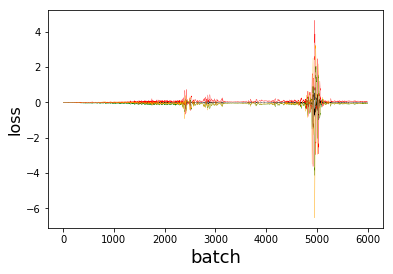

In [11]:
fig = plt.figure()
plt.plot([x[0] for x in gan.d_losses], color='black', linewidth=0.25)

plt.plot([x[1] for x in gan.d_losses], color='green', linewidth=0.25)
plt.plot([x[2] for x in gan.d_losses], color='red', linewidth=0.25)
plt.plot(gan.g_losses, color='orange', linewidth=0.25)

plt.xlabel('batch', fontsize=18)
plt.ylabel('loss', fontsize=16)

# plt.xlim(0, 2000)
# plt.ylim(0, 2)

plt.show()

In [12]:
def compare_images(img1, img2):
    return np.mean(np.abs(img1 - img2))

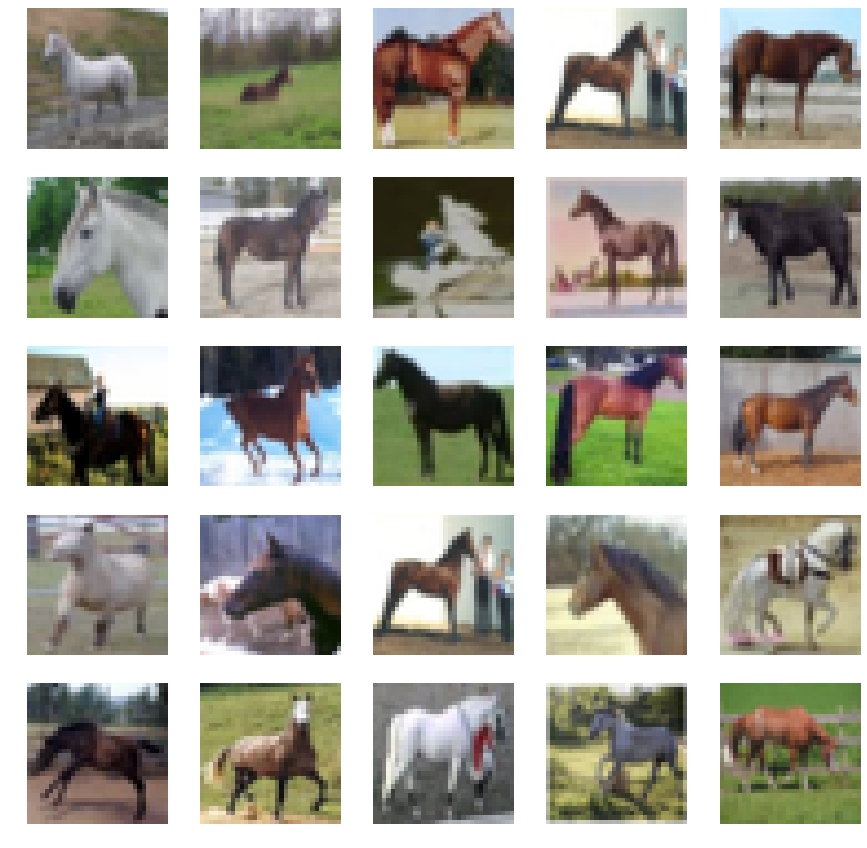

In [15]:
r, c = 5, 5

idx = np.random.randint(0, x_train.shape[0], BATCH_SIZE)
true_imgs = (x_train[idx] + 1) *0.5

fig, axs = plt.subplots(r, c, figsize=(15,15))
cnt = 0

for i in range(r):
    for j in range(c):
        axs[i,j].imshow(true_imgs[cnt], cmap = 'gray_r')
        axs[i,j].axis('off')
        cnt += 1
fig.savefig(os.path.join(RUN_FOLDER, "images/real.png"))
plt.show()

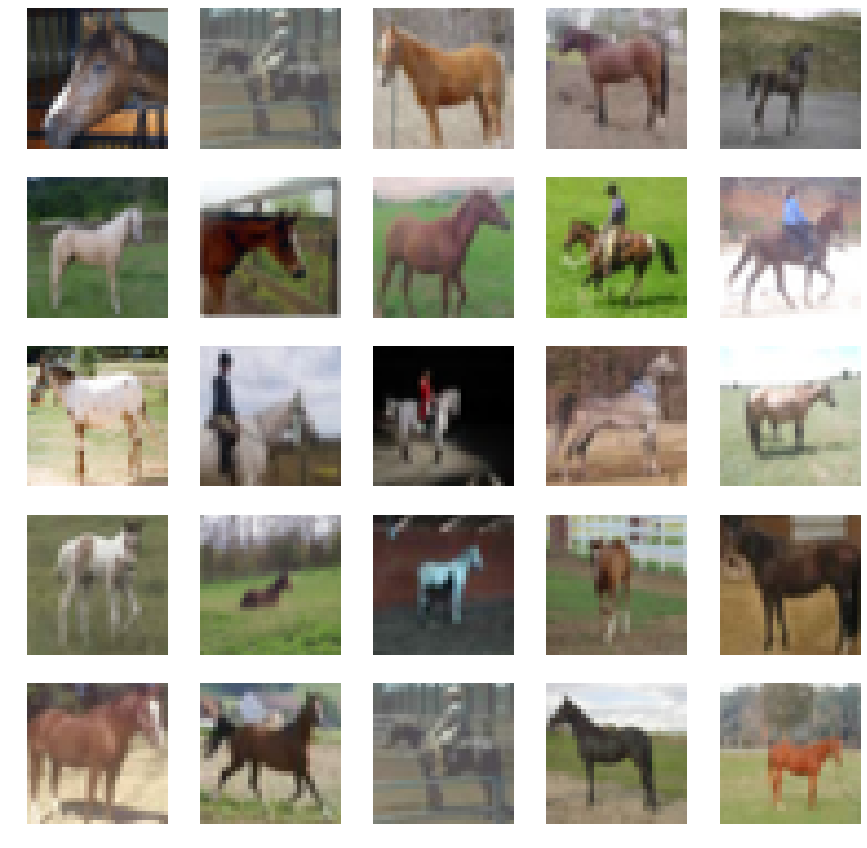

In [16]:
r, c = 5, 5
noise = np.random.normal(0, 1, (r * c, gan.z_dim))
gen_imgs = gan.generator.predict(noise)

#Rescale images 0 - 1

gen_imgs = 0.5 * (gen_imgs + 1)
# gen_imgs = np.clip(gen_imgs, 0, 1)

fig, axs = plt.subplots(r, c, figsize=(15,15))
cnt = 0

for i in range(r):
    for j in range(c):
        axs[i,j].imshow(np.squeeze(gen_imgs[cnt, :,:,:]), cmap = 'gray_r')
        axs[i,j].axis('off')
        cnt += 1
fig.savefig(os.path.join(RUN_FOLDER, "images/sample.png"))
plt.close()


fig, axs = plt.subplots(r, c, figsize=(15,15))
cnt = 0

for i in range(r):
    for j in range(c):
        c_diff = 99999
        c_img = None
        for k_idx, k in enumerate((x_train + 1) * 0.5):
            
            diff = compare_images(gen_imgs[cnt, :,:,:], k)
            if diff < c_diff:
                c_img = np.copy(k)
                c_diff = diff
        axs[i,j].imshow(c_img, cmap = 'gray_r')
        axs[i,j].axis('off')
        cnt += 1

fig.savefig(os.path.join(RUN_FOLDER, "images/sample_closest.png"))
plt.show()